## Statistics Assignment

All of the following are based on data from your project. Each student has to perform analysis on their own no collaboration between team members. Here are the datasets to be analyzed by team datasets:

***
### ***For Part 1 and 2***

##### Library-Computer-Usage-Analysis
* Computer Utilization Data by Date-Time

##### Volag
* Flight Delay Data by Date-Time

##### Slipper-Streets
* Crash Data by Date-Time

##### Corpus
* Reviews of Electronic product (laptop) by Date-Time

##### SteamConnect
* Early Access Score by Release Date-Time

##### Toxic-Crusaders
* Chemical Industry Release (pick a particular industry) by Date-Time

##### Uni-X
* Repayment Rate for Female gender by Date-Time

##### WRF
* Migration count by Date-Time


### Part 1

* **Conduct Decriptive Analytics (Mean, Median, Quartile) calculation by each division of Date-Time (most probably year or 6 month duration, if you have shorter use 1 month)**
* **Calculate divergence of mean and median in your data**
* **Visualize the data and draw inferences**

### Part 2
* **Conduct Probablity distibution analysis based on the data. Analyze your data based on the type of distribution it best fits (for PDF and CDF)**
* **Conduct Method of Moments analysis on your data to suggest the best fit distribution. Visualize the results**

***
***

### ***For Part 3***
* Compare with the variable with other variables in your project

### Part 3
* **Formulate a null hypothesis and evaluate it, perform correlation measures, and construct a linear regression model**

***

This Notebook contains the detailed analysis of the distribution od data in TRI and Zillow datasets. 

Here I tried to analyze the data distribution and find correlations between various features of the datasets

Also, towards the end of the analysis , formulated a null hypothesis and tested the hypotehsis to reject/accept it. 

Fit the model to Linear Regression and found supportive analysis for the null hypothesis.

Preparing data for analysis

In [165]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import vincenty
%pylab inline
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gamma', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [166]:
data_tri_2002 = pd.read_csv('data/TRI_2002_NC.csv')
data_tri_2003 = pd.read_csv('data/TRI_2003_NC.csv')
data_tri_2004 = pd.read_csv('data/TRI_2004_NC.csv')
data_tri_2005 = pd.read_csv('data/TRI_2005_NC.csv')
data_tri_2006 = pd.read_csv('data/TRI_2006_NC.csv')
data_tri_2007 = pd.read_csv('data/TRI_2007_NC.csv')
data_tri_2008 = pd.read_csv('data/TRI_2008_NC.csv')
data_tri_2009 = pd.read_csv('data/TRI_2009_NC.csv')
data_tri_2015 = pd.read_csv('data/TRI_2015_NC.csv')
data_tri_2014 = pd.read_csv('data/TRI_2014_NC.csv')
data_tri_2013 = pd.read_csv('data/TRI_2013_NC.csv')
data_tri_2012 = pd.read_csv('data/TRI_2012_NC.csv')
data_tri_2011 = pd.read_csv('data/TRI_2011_NC.csv')
data_tri_2010 = pd.read_csv('data/TRI_2010_NC.csv')
data_zillow_condo = pd.read_csv('data/Zip_Zhvi_1bedroom.csv')
data_region_centroids = pd.read_csv('data/zipcode.csv')

Calculating average prices for each year from the given months data of each year



In [167]:
data_zillow_condo1 = data_zillow_condo
for i in range(2002,2016):
    year= str(i)+'AVG_PRICE'
    data_zillow_condo1[year]=data_zillow_condo1.loc[:,str(i)+'-01':str(i)+'-12'].mean(axis=1)
    

Selecting only non null values (in column ON-SITE_RELEASE_TOTAL) - As the housing is usually dependent on the On-SITE releases more than OFF-SITE

In [168]:
def trim_tri_df(tri_df):
    # list of the categories we want from each tri data set
    desired_categories = ['YEAR','FACILITY_NAME','FEDERAL_FACILITY','PARENT_COMPANY_NAME',   \
                          'INDUSTRY_SECTOR','ZIP','ST', 'CITY', 'COUNTY', 'LATITUDE',        \
                          'LONGITUDE', 'CHEMICAL', 'UNIT_OF_MEASURE', 'CARCINOGEN',          \
                          'CLEAR_AIR_ACT_CHEMICAL','TOTAL_RELEASES','ON-SITE_RELEASE_TOTAL', \
                          'OFF-SITE_RELEASE_TOTAL', 'OFF-SITE_RECYCLED_TOTAL',               \
                          '8.4_RECYCLING_ON-SITE', '8.8_ONE-TIME_RELEASE']   
    
    tri_df = tri_df[desired_categories]
    
    #rename categories as described above
    tri_df.rename(columns = {                                                     \
            'ST':'STATE',                                                                    \
            'CLEAR_AIR_ACT_CHEMICAL':'CAA_CHEMICAL',                                         \
            'ON-SITE_RELEASE_TOTAL':'ON_SITE_RELEASE_TOTAL',                                 \
            'OFF-SITE_RELEASE_TOTAL':'OFF_SITE_RELEASE_TOTAL',                               \
            '8.4_RECYCLING_ON-SITE':'ON_SITE_RECYCLED_TOTAL',                                \
            'OFF-SITE_RECYCLED_TOTAL':'OFF_SITE_RECYCLED_TOTAL',                             \
            '8.8_ONE-TIME_RELEASE':'ONE_TIME_RELEASES',\
             '8.4_RECYCLING_ON-SITE':'RECYCLING_ON_SITE'
                            }, inplace=True)
    
    #return trimmed tri
    return tri_df  

In [169]:
us2002_trimmed = trim_tri_df(data_tri_2002)
us2003_trimmed = trim_tri_df(data_tri_2003)
us2004_trimmed = trim_tri_df(data_tri_2004)
us2005_trimmed = trim_tri_df(data_tri_2005)
us2006_trimmed = trim_tri_df(data_tri_2006)
us2007_trimmed = trim_tri_df(data_tri_2007)
us2008_trimmed = trim_tri_df(data_tri_2008)
us2009_trimmed = trim_tri_df(data_tri_2009)
us2010_trimmed = trim_tri_df(data_tri_2010)
us2011_trimmed = trim_tri_df(data_tri_2011)
us2012_trimmed = trim_tri_df(data_tri_2012)
us2013_trimmed = trim_tri_df(data_tri_2013)
us2014_trimmed = trim_tri_df(data_tri_2014)
us2015_trimmed = trim_tri_df(data_tri_2015)

/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Dropping those rows where the ON_SITE_RELEASE_TOTAL value is Nan. As it is an important aspect that is considered in the analysis.

In [170]:
us2002_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True) 
us2003_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True) 
us2004_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2005_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2006_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2007_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2008_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2009_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2010_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2011_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2012_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2013_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2014_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)
us2015_trimmed.dropna(subset=['ON_SITE_RELEASE_TOTAL'],inplace=True)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingW

Merging all the data 

In [171]:
data_tri_AllYear=pd.concat([us2002_trimmed,us2003_trimmed,us2004_trimmed,us2005_trimmed,us2006_trimmed,us2007_trimmed,us2008_trimmed,us2009_trimmed,us2010_trimmed,us2011_trimmed,us2012_trimmed,us2013_trimmed,us2014_trimmed,us2015_trimmed])
data_tri_AllYear.head()

   YEAR                        FACILITY_NAME FEDERAL_FACILITY  \
0  2002                CAMPBELL OIL & GAS CO               NO   
1  2002              LINDSEY CAMPBELL OIL CO               NO   
2  2002              LINDSEY CAMPBELL OIL CO               NO   
3  2002  CLARCOR ENGINE MOBILE SOLUTIONS LLC               NO   
4  2002      TRINITY CONTAINERS LLC PLT 1004               NO   

      PARENT_COMPANY_NAME           INDUSTRY_SECTOR    ZIP STATE         CITY  \
0   CAMPBELL OIL & GAS CO  Petroleum Bulk Terminals  28328    NC      CLINTON   
1   CAMPBELL OIL & GAS CO  Petroleum Bulk Terminals  28358    NC    LUMBERTON   
2   CAMPBELL OIL & GAS CO  Petroleum Bulk Terminals  28358    NC    LUMBERTON   
3             CLARCOR INC                 Machinery  27889    NC   WASHINGTON   
4  TRINITY INDUSTRIES INC         Fabricated Metals  27801    NC  ROCKY MOUNT   

      COUNTY   LATITUDE        ...                         CHEMICAL  \
0    SAMPSON  35.007350        ...                 

Part 1: I chose to perform the descriptive analysis on both the datasets. 1. TRI dataset for years 2002-2016 2. Zillow dataset through the years 1997-2017

Let us look at the distribution of the sum of Chemicals Industry's TOTAL_RELEASES over the years 2002 to 2015

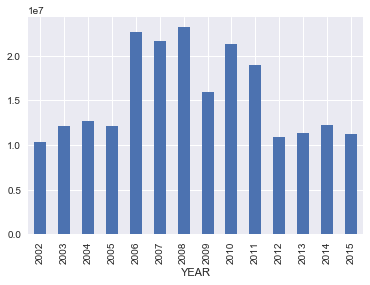

In [172]:
data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].sum().plot(kind='bar')




Above graph is a distribution of Total Releases of Chemicals(Industry Sector). There seems to be an increase in Total Releases in the years 2006-2011, with the highest reached in 2008 amd least being 2002.

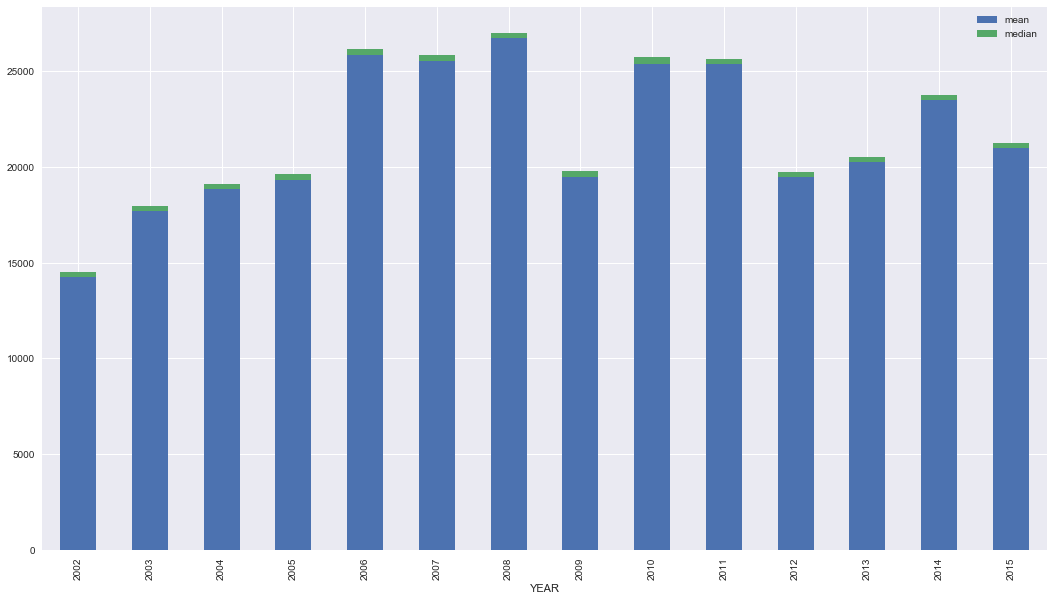

In [173]:

lt=pd.DataFrame(data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].sum())
lt['sum']=data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].sum()
lt['mean']=data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].mean()
lt['median']=data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].median()
lt
lt.plot.bar(stacked=True,x=lt.index,y=['mean','median'],figsize=(18,10))




Above graph is the plot of mean and median values of the Total Releases of Chemicals(Industry Sector) each year from 2002 through 2015. It can be observed that the mean value is extremely highler when compared to the median value each year. The stacked bar shows mean value on the lower bar(blue) and the median value is marked on the higher end of the bar(green). 
The difference between the mean and median is the divergence of the distribution of Total Release values. The Divergence is extremely huge as can be seen from the above plot.

Another way of looking at the descriptive analysis of the data is , by plotting the mean,median data of the total releases through the years 2002,2015

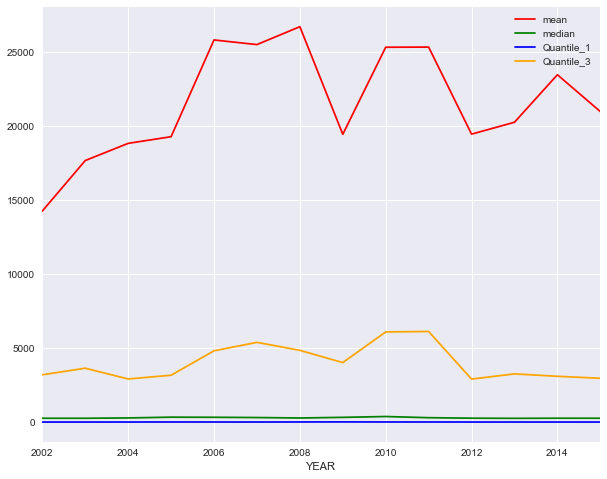

In [174]:
fig, ax = subplots()
#ax=data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].sum().plot()
data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].mean().plot(color='red',figsize=(10,8),ax=ax)
data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].median().plot(color='green',ax=ax)
data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].apply(lambda x: numpy.percentile(x, 25)).plot(color='blue',ax=ax)
data_tri_AllYear[data_tri_AllYear['INDUSTRY_SECTOR']=='Chemicals'].groupby(['YEAR'])['TOTAL_RELEASES'].apply(lambda x: numpy.percentile(x, 75)).plot(color='orange',ax=ax)
ax.legend(['mean','median','Quantile_1','Quantile_3'])

From the above graph we can see the descriptive analysis of the releases of each year through 2002-2015 can be seen. Mean is shown in red line, where as the median is shown in the green line. The divergence is clearly very high. while the Quantlies 25% and 75% are marked in blue and orange respectively.

Let us now see the distribution and the descriptive analysis of the Zillow Data

# Part 2: Probability Distribution Analysis

For this part of the question, I'm Considering the Zillow data to observe the Probability Distribution Analysis. The Zillow data has housing prices by month from 1996 to 2017. 

In [175]:
col=['RegionID','City','State','Metro','CountyName','SizeRank','2010AVG_PRICE','2011AVG_PRICE','2012AVG_PRICE','2013AVG_PRICE','2014AVG_PRICE','2015AVG_PRICE']
data_zillow=data_zillow_condo
data_zillow=data_zillow.drop(['RegionID','City','State','Metro','CountyName','SizeRank','2002AVG_PRICE','2003AVG_PRICE','2004AVG_PRICE','2005AVG_PRICE','2006AVG_PRICE','2007AVG_PRICE','2008AVG_PRICE','2009AVG_PRICE','2010AVG_PRICE','2011AVG_PRICE','2012AVG_PRICE','2013AVG_PRICE','2014AVG_PRICE','2015AVG_PRICE'],axis=1)
data_zillow.head()

   RegionName   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
0       10025       NaN       NaN       NaN       NaN       NaN       NaN   
1       60657   95000.0   95600.0   95400.0   94700.0   94700.0   95600.0   
2       60614  114500.0  114500.0  113900.0  113700.0  113500.0  113300.0   
3       60640   78900.0   79200.0   79200.0   79500.0   79800.0   80300.0   
4       94109  191800.0  193500.0  193900.0  192300.0  193400.0  194100.0   

    1996-10   1996-11   1996-12    ...      2016-12  2017-01  2017-02  \
0       NaN       NaN       NaN    ...     766300.0   767300   771000   
1   96200.0   96700.0   97100.0    ...     212800.0   213900   215200   
2  113300.0  113600.0  114200.0    ...     244000.0   246600   247100   
3   80700.0   81000.0   81200.0    ...     144700.0   146000   147500   
4  192400.0  189800.0  192000.0    ...     802600.0   794100   791100   

   2017-03  2017-04  2017-05  2017-06  2017-07   2017-08   2017-09  
0   775100   791600   835700 

Drop all those rows where the columns have Nan values. Let us look at the distribution of the average prices over all the months in each year and plot the average price values of each year. Let's see how that looks like.

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ef2c208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1332db278>]], dtype=object)

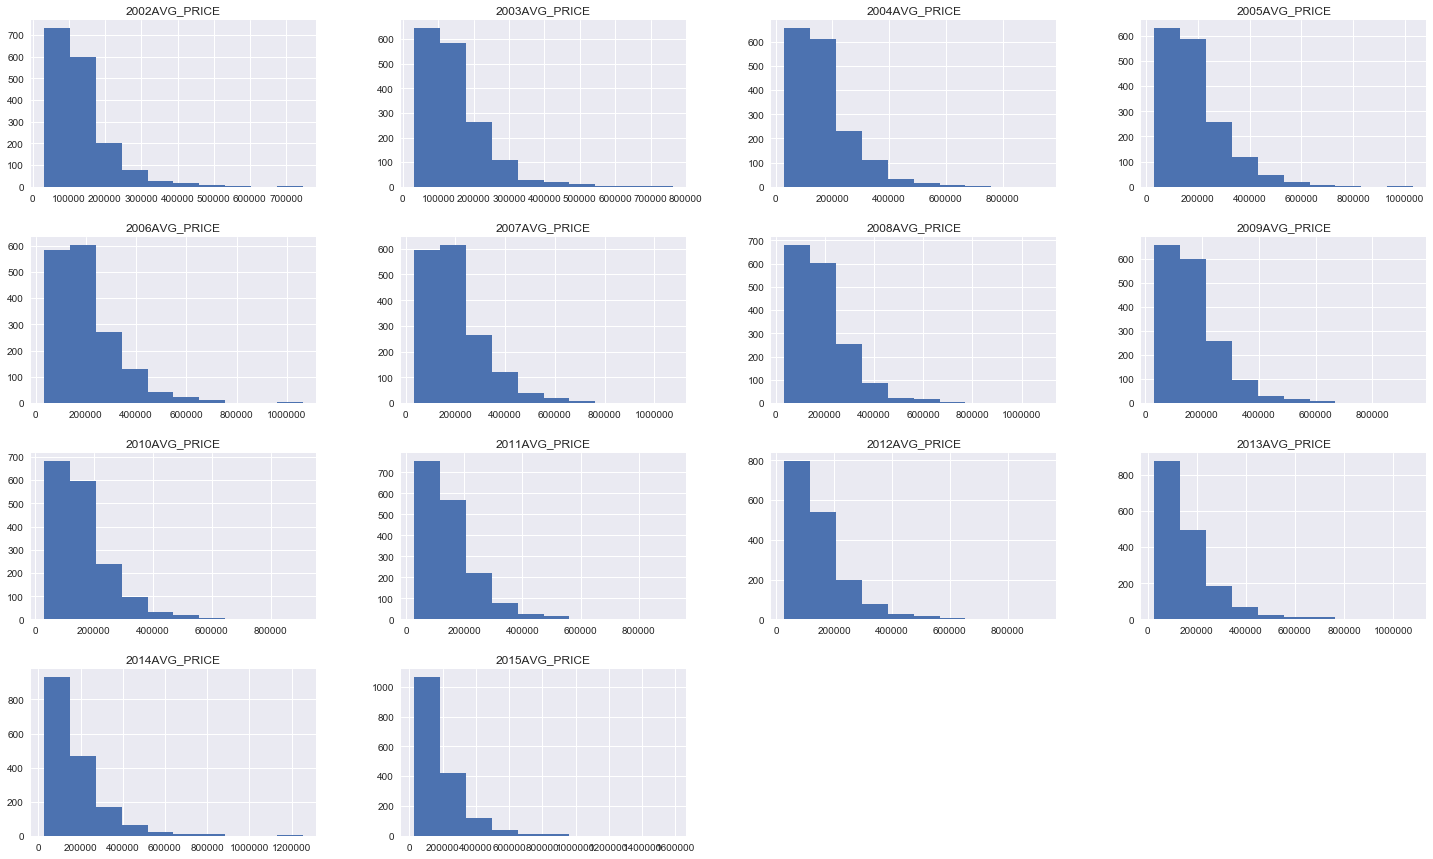

In [176]:
col=['RegionID','City','State','Metro','CountyName','SizeRank','2010AVG_PRICE','2011AVG_PRICE','2012AVG_PRICE','2013AVG_PRICE','2014AVG_PRICE','2015AVG_PRICE']
data_zi=data_zillow_condo[['2002AVG_PRICE','2003AVG_PRICE','2004AVG_PRICE','2005AVG_PRICE','2006AVG_PRICE','2007AVG_PRICE','2008AVG_PRICE','2009AVG_PRICE','2010AVG_PRICE','2011AVG_PRICE','2012AVG_PRICE','2013AVG_PRICE','2014AVG_PRICE','2015AVG_PRICE']]
data_zi.dropna(inplace=True)
data_zi.hist(figsize=(25,15))

A few observations can be made by looking at the above graphs.

The data looks skewed with a longer tail to the right than to the left.Also, we know that the data is conitnuous and is positive. These observations hint that the distribution could be Gamma Distribution



Let's calculate the method of moments. 

For the gamma distribution, the mean and variance are:


In [177]:
data_zi_mean = data_zi.mean()


In [178]:
data_zi_var = data_zi.var() 

In [179]:
alpha_mom = data_zi_mean ** 2 / data_zi_var
beta_mom = data_zi_var / data_zi_mean

Let's plot the data histogram and try plotting a grid of plots for the distribution of Average House Prices for each year looping from 2002 to 2015, using the gamma distribution:

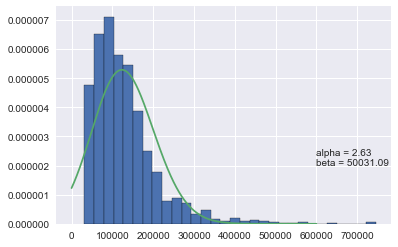

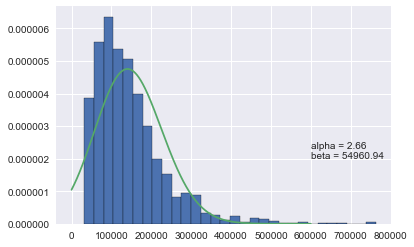

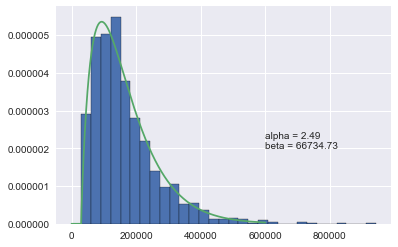

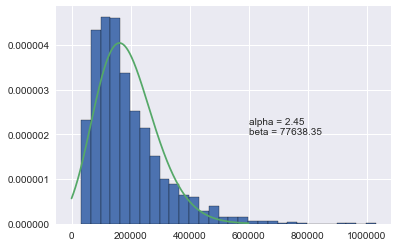

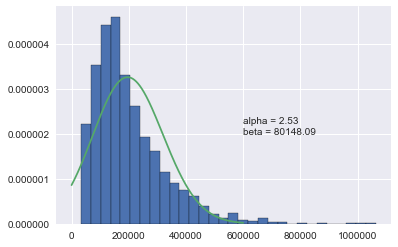

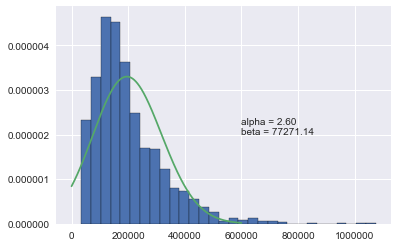

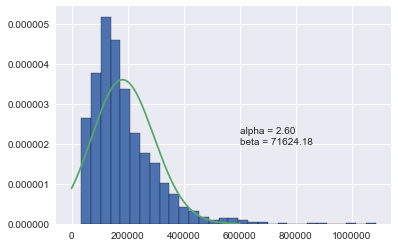

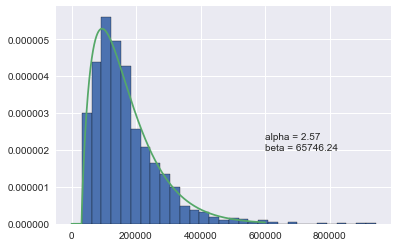

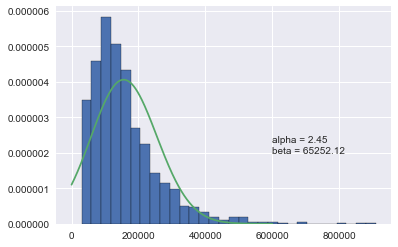

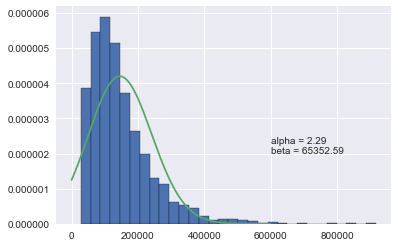

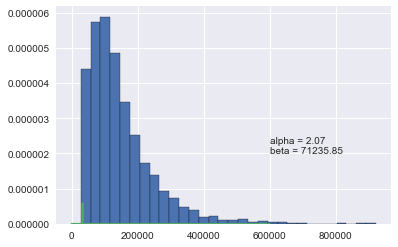

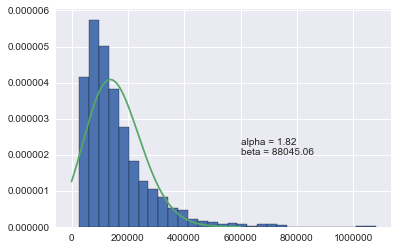

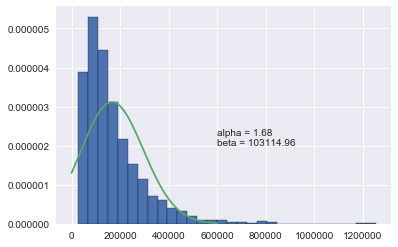

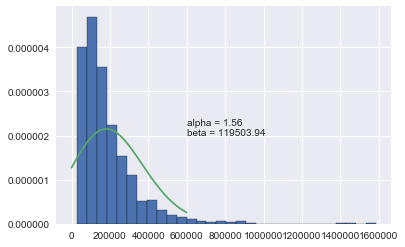

In [180]:
from scipy.stats.distributions import gamma
for i in range(2002,2016):
    plt.figure()
    data_zi[str(i)+'AVG_PRICE'].hist(normed=True, bins=30, ec='black')
    ag,bg,cg = stats.gamma.fit(data_zi[str(i)+'AVG_PRICE'])  
    pdf_gamma = stats.gamma.pdf(np.linspace(0, 600000,30000), ag, bg,cg)  
    #print(pdf_gamma)
    plt.plot(np.linspace(0,600000, 30000), pdf_gamma, label="Gamma")
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[str(i)+'AVG_PRICE'], beta_mom[str(i)+'AVG_PRICE'])
    plt.annotate(label, xy=(600000, 0.000002))



The above analysis shows that the data considered i.e, Zillow Housing Prices, has Gamma Distribution as the best fit distribution.


# PART 3 - 

Null Hypothesis - There is no relation between the prices of the houses to the distance of the houses from industry facilities.
Assumptions : In Zillow data, the prices of the houses is considered to be the mean of all houses in that zipcode area.
So,here the centroid of the zipcode area is taken and the distances of the industries from this centroid are calculated and depending on the distances of the industries from the centroids, the prices of the houses(at the centroid of the respective zipcode of the industry facility) are compared.

Keeping only the region name and 2015 related columns in the Zillow dataframe.

In [181]:
data_columns = ['RegionName','2002AVG_PRICE','2003AVG_PRICE','2004AVG_PRICE','2005AVG_PRICE','2006AVG_PRICE','2007AVG_PRICE','2008AVG_PRICE','2009AVG_PRICE','2010AVG_PRICE','2011AVG_PRICE','2012AVG_PRICE','2013AVG_PRICE','2014AVG_PRICE','2015AVG_PRICE']
data_zillow_condo1 = data_zillow_condo1.loc[:,(data_columns)]

Renaming the column name from RegionName to ZIP - to make it compatible to merge with the TRI dataframe. Renaming the latitude column name to CENTROID_LATITUDE, longitude to CENTROID_LONGITUDE, to keep the names more meaningful. Keeping only the relevant useful columns from the actual dataframe.

In [182]:
data_zillow_condo1.rename(columns={'RegionName':'ZIP'},inplace=True)

In [183]:
data_region_centroids.rename(columns = {'zip':'ZIP','latitude':'CENTROID_LATITUDE','longitude':'CENTROID_LONGITUDE'},inplace=True)

Merge the TRI and Zillow_condo dataframes

In [184]:
data_common_tri_zillow = pd.merge(data_tri_AllYear,data_zillow_condo1)

Merge the TRI_Zillow merged dataframe with the data_centroid dataframe

In [185]:
data_common_tri_zillow_centroid = pd.merge(data_common_tri_zillow,data_region_centroids)

Drropping all the rows where the Latitude,LONGITUDE, CENTROID_LATITUDE,CENTROID_LONGITUDE values are Nan.

In [186]:
data_common_tri_zillow_centroid.dropna(subset=['LATITUDE','LONGITUDE','CENTROID_LATITUDE','CENTROID_LONGITUDE'],inplace=True)
data_common_tri_zillow_centroid.head()

   YEAR                    FACILITY_NAME FEDERAL_FACILITY  \
0  2002  TRINITY CONTAINERS LLC PLT 1004               NO   
1  2002                   KABA ILCO CORP               NO   
2  2002                   KABA ILCO CORP               NO   
3  2002        SEPRO DISTRIBUTION CENTER               NO   
4  2002                   KABA ILCO CORP               NO   

      PARENT_COMPANY_NAME    INDUSTRY_SECTOR    ZIP STATE         CITY  \
0  TRINITY INDUSTRIES INC  Fabricated Metals  27801    NC  ROCKY MOUNT   
1          KABA ILCO CORP  Fabricated Metals  27801    NC  ROCKY MOUNT   
2          KABA ILCO CORP  Fabricated Metals  27801    NC  ROCKY MOUNT   
3              SEPRO CORP          Chemicals  27801    NC  ROCKY MOUNT   
4          KABA ILCO CORP  Fabricated Metals  27801    NC  ROCKY MOUNT   

      COUNTY   LATITUDE ...   2012AVG_PRICE 2013AVG_PRICE 2014AVG_PRICE  \
0  EDGECOMBE  35.923250 ...         68675.0       72725.0  73591.666667   
1       NASH  35.987420 ...         68

Define a function "calculate_distance" used to calculate the distance between the facility and the centorid of the zip that the facility is located in.

In [187]:
def calculate_distance(df):
    return vincenty((df['LATITUDE'],df['LONGITUDE']),(df['CENTROID_LATITUDE'],df['CENTROID_LONGITUDE'])).miles
    

Apply the "calculate_distance" function to each facility in the dataframe and add a new column 'DIST_FROM_CENTROID' storing the calculated value for each facility.

In [188]:
data_common_tri_zillow_centroid['DIST_FROM_CENTROID']=data_common_tri_zillow_centroid.apply(calculate_distance,axis=1)


data_common_tri_zillow_centroid['DIST_FROM_CENTROID']=data_common_tri_zillow_centroid.apply(calculate_distance,axis=1)


In [189]:
data_common_tri_zillow_centroid[['LATITUDE','LONGITUDE','CENTROID_LATITUDE','CENTROID_LONGITUDE','DIST_FROM_CENTROID']].head()

    LATITUDE  LONGITUDE  CENTROID_LATITUDE  CENTROID_LONGITUDE  \
0  35.923250 -77.796870          35.935125           -77.77076   
1  35.987420 -77.787040          35.935125           -77.77076   
2  35.987420 -77.787040          35.935125           -77.77076   
3  35.963889 -77.781111          35.935125           -77.77076   
4  35.987420 -77.787040          35.935125           -77.77076   

   DIST_FROM_CENTROID  
0            1.677492  
1            3.719231  
2            3.719231  
3            2.066321  
4            3.719231  

Calculate the mean of house prices for each year based on grouping on the distance from centroid.

In [190]:
data_common_tri_zillow_centroid.DIST_FROM_CENTROID=round(data_common_tri_zillow_centroid.DIST_FROM_CENTROID,1)
for i in range(2002,2016):
    data_common_tri_zillow_centroid['MEAN_ACROSSCENTROID_PRICE'+str(i)] = data_common_tri_zillow_centroid[data_common_tri_zillow_centroid['YEAR']==i].groupby('DIST_FROM_CENTROID')[str(i)+'AVG_PRICE'].transform(mean)


Trying to find correlation between the Distance_from_centroid feature and the Mean_across_centroid_price for each year

In [191]:
for i in range(2002,2016):
    names = ['YEAR','INDUSTRY_SECTOR','LATITUDE','LONGITUDE', 'CHEMICAL', 'CARCINOGEN',\
             'CAA_CHEMICAL','TOTAL_RELEASES','ON_SITE_RELEASE_TOTAL', \
                          'OFF_SITE_RELEASE_TOTAL', 'OFF_SITE_RECYCLED_TOTAL',\
                          'RECYCLING_ON_SITE', 'ONE_TIME_RELEASES',\
             'DIST_FROM_CENTROID','MEAN_ACROSSCENTROID_PRICE'+str(i)]   
    data_try = data_common_tri_zillow_centroid[names]
    df_tem=data_try[(data_try['YEAR']==i )]
    print ('Year :' ,i)
    print(df_tem['DIST_FROM_CENTROID'].corr(df_tem['MEAN_ACROSSCENTROID_PRICE'+str(i)]))
    

Year : 2002
0.23840640058
Year : 2003
0.229499675975
Year : 2004
0.0176639396295
Year : 2005
0.116188859981
Year : 2006
0.365046346025
Year : 2007
0.266355203478
Year : 2008
0.31233841005
Year : 2009
0.247074113761
Year : 2010
0.448559433874
Year : 2011
0.389660112173
Year : 2012
0.234080067549
Year : 2013
0.25660547941
Year : 2014
0.22702200862
Year : 2015
0.248691451444


This correlations are positive for the distance_from_centroid to the mean_acrosscentroid_price features.

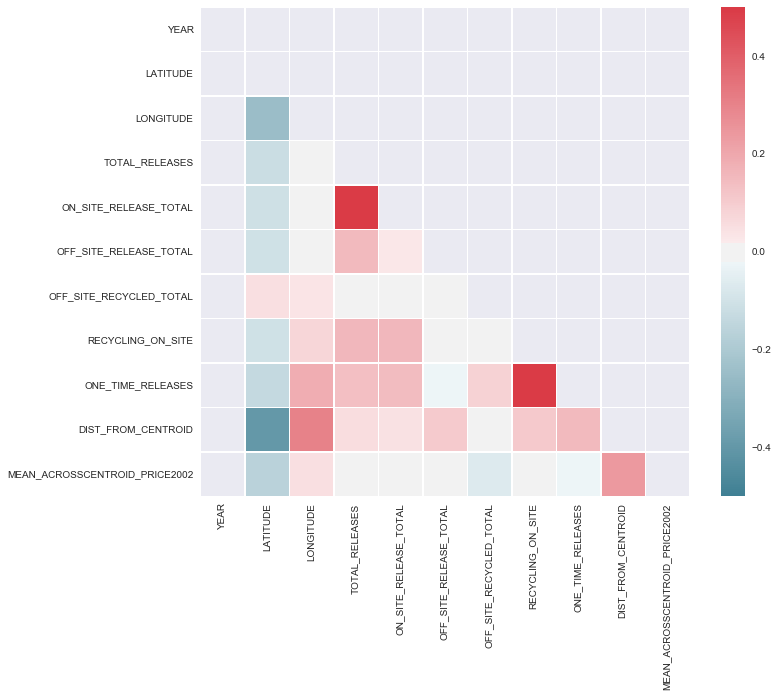

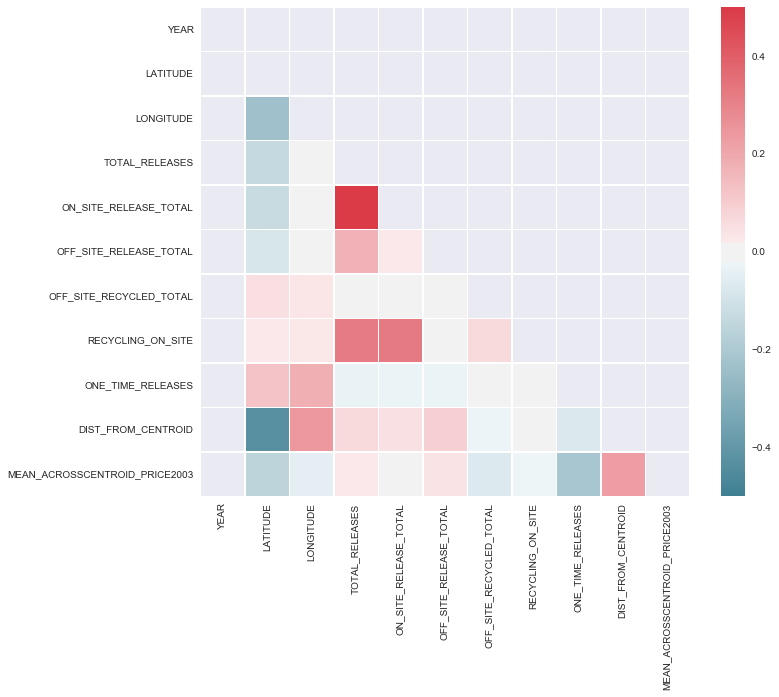

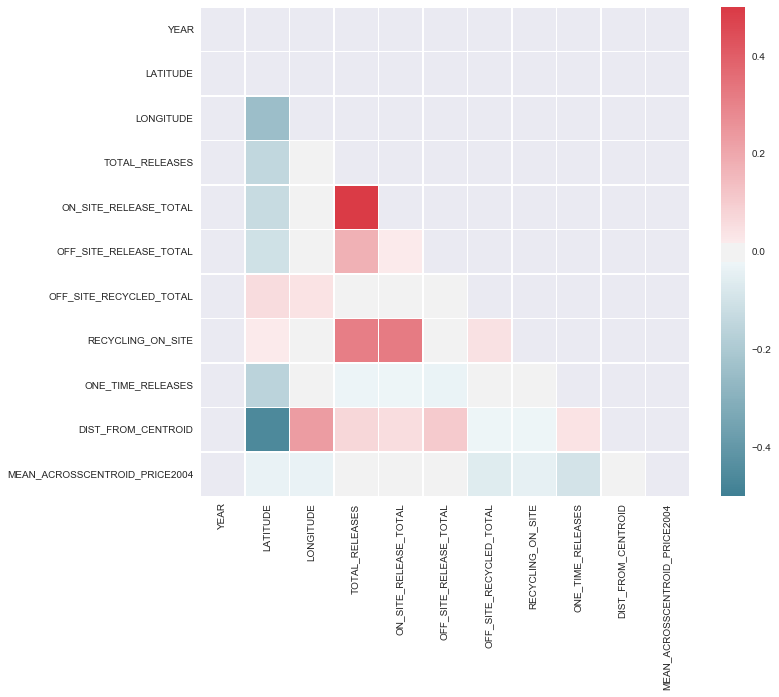

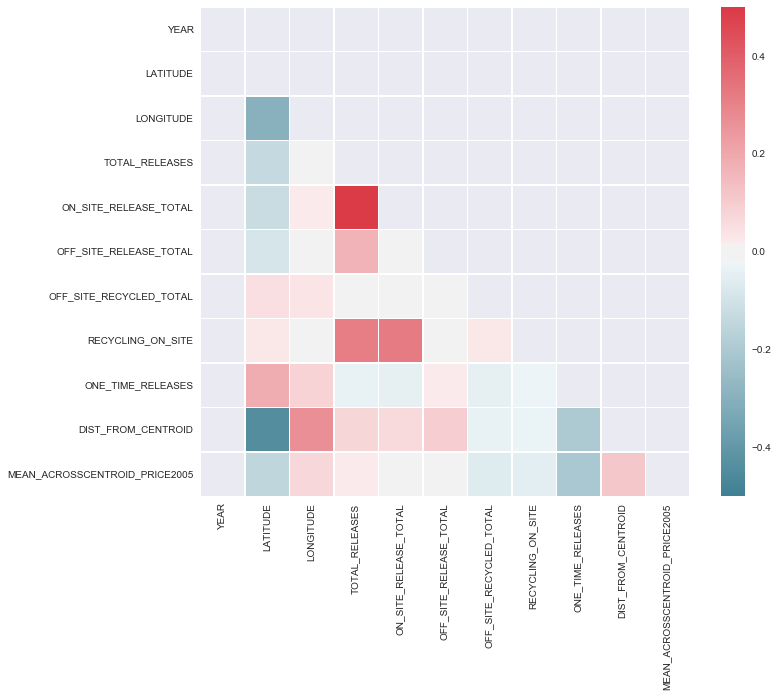

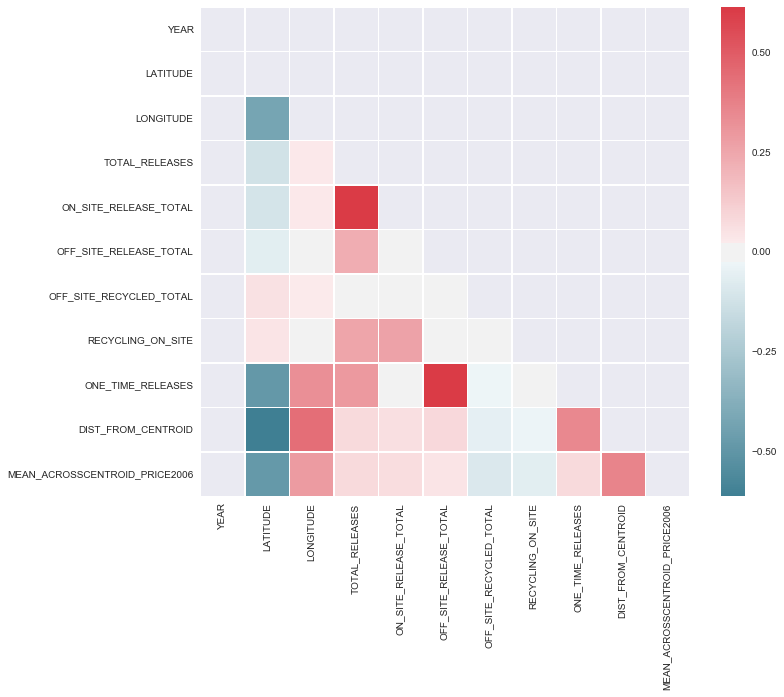

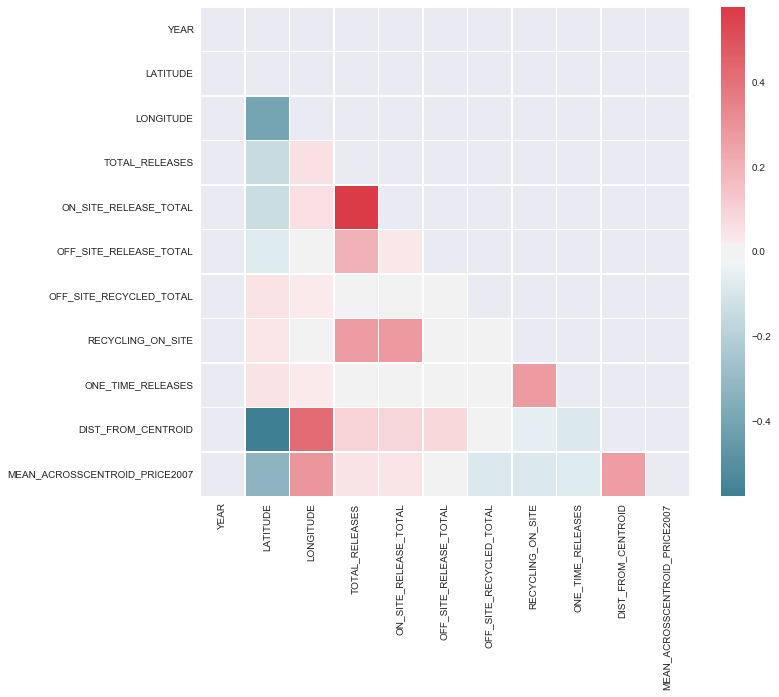

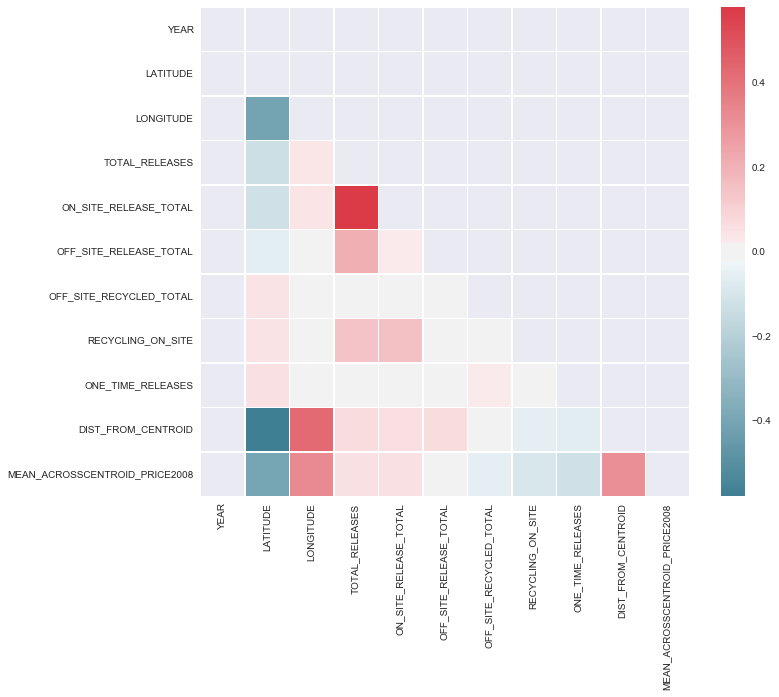

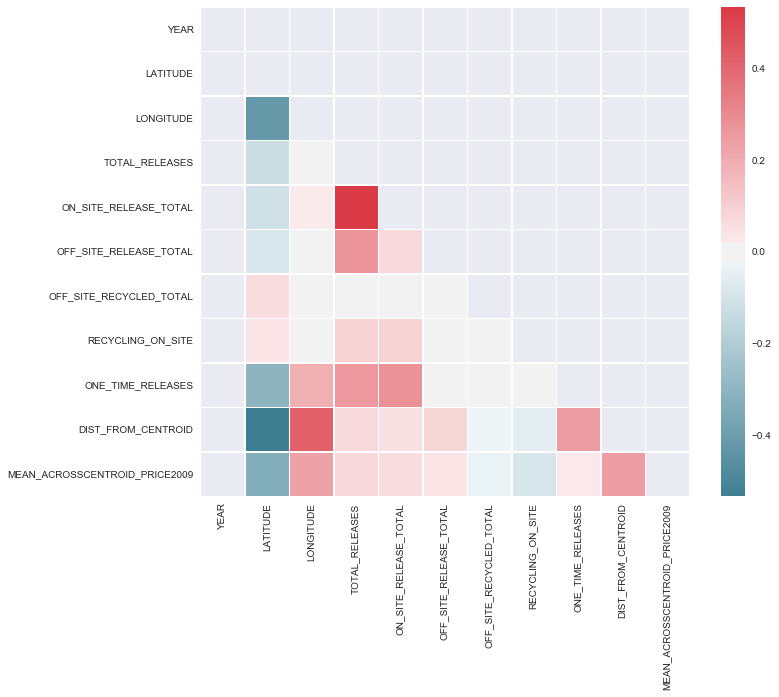

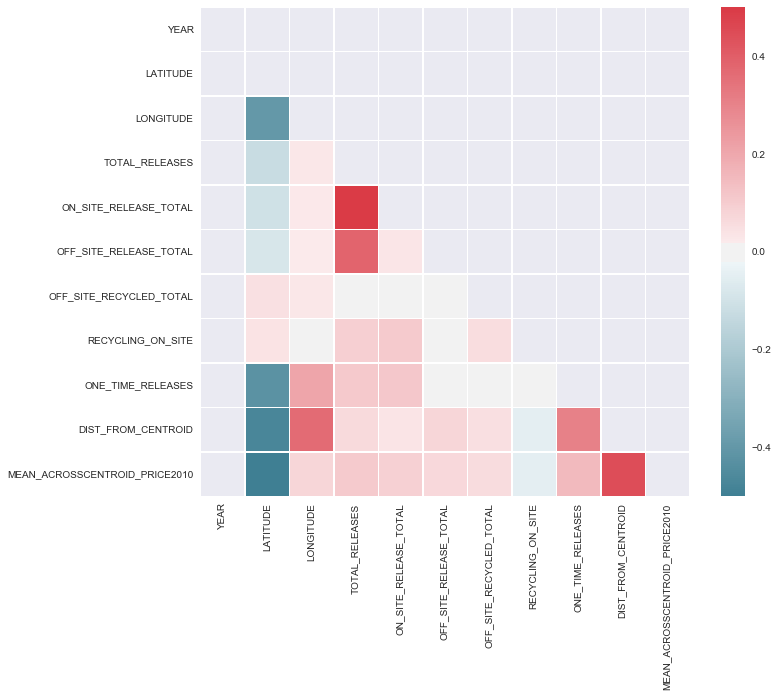

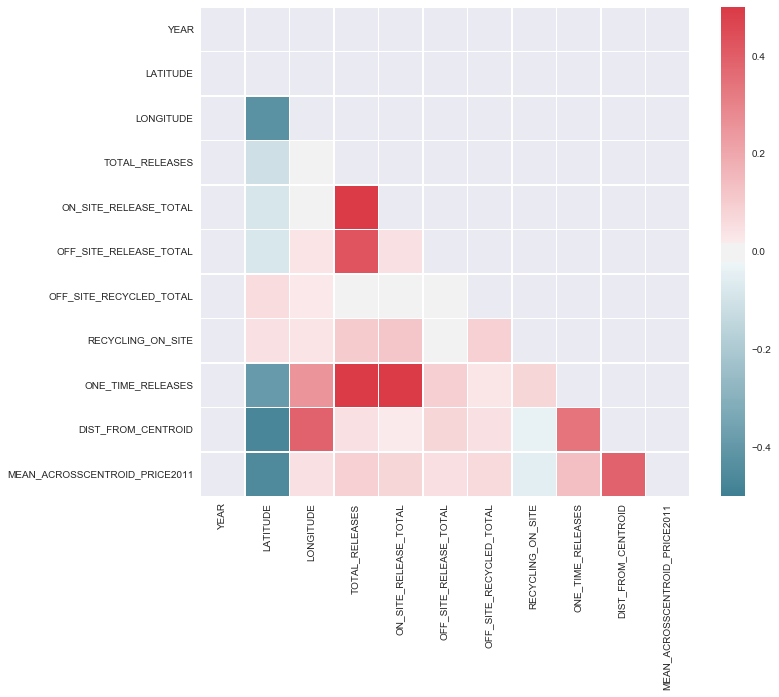

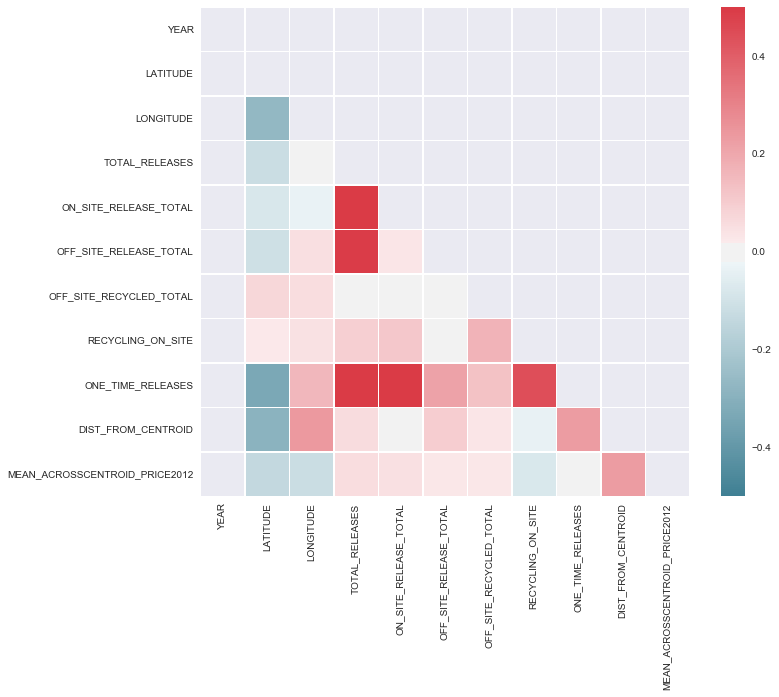

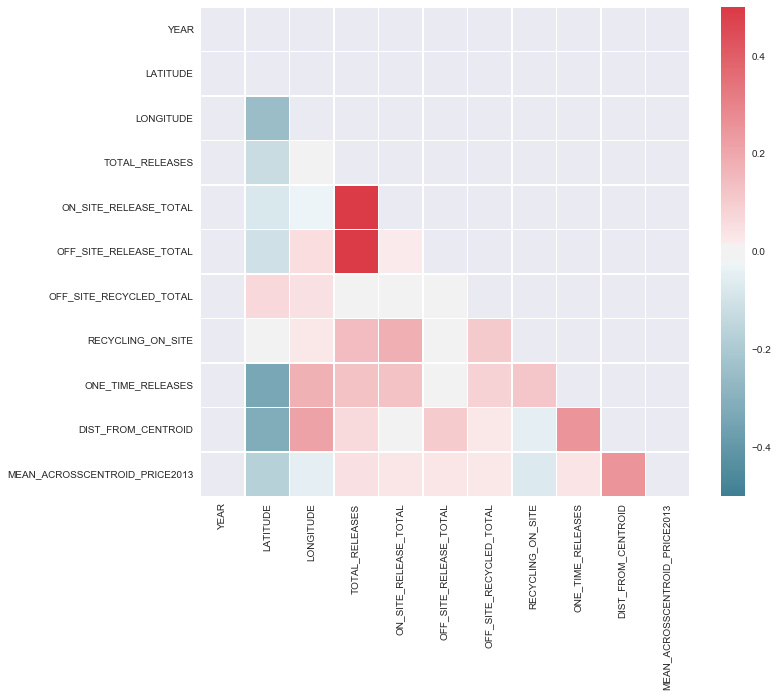

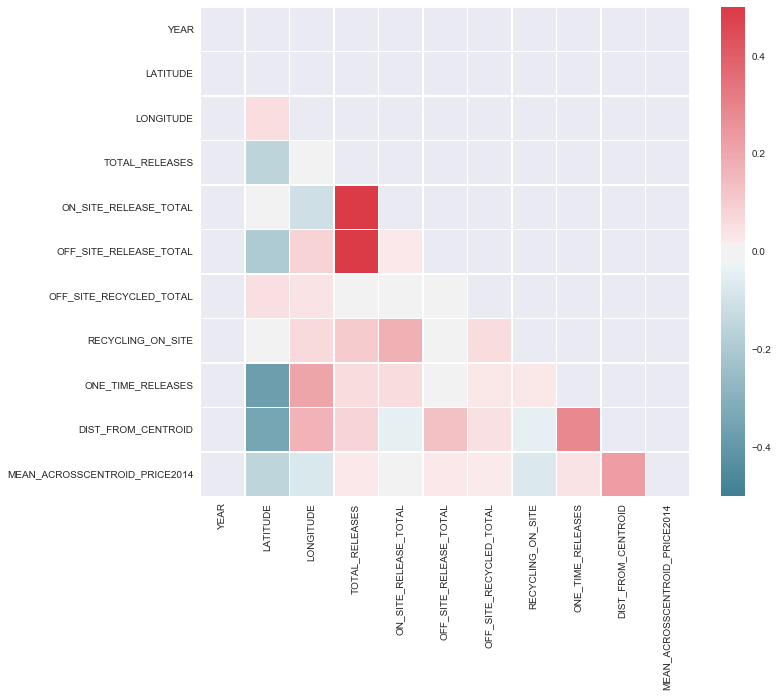

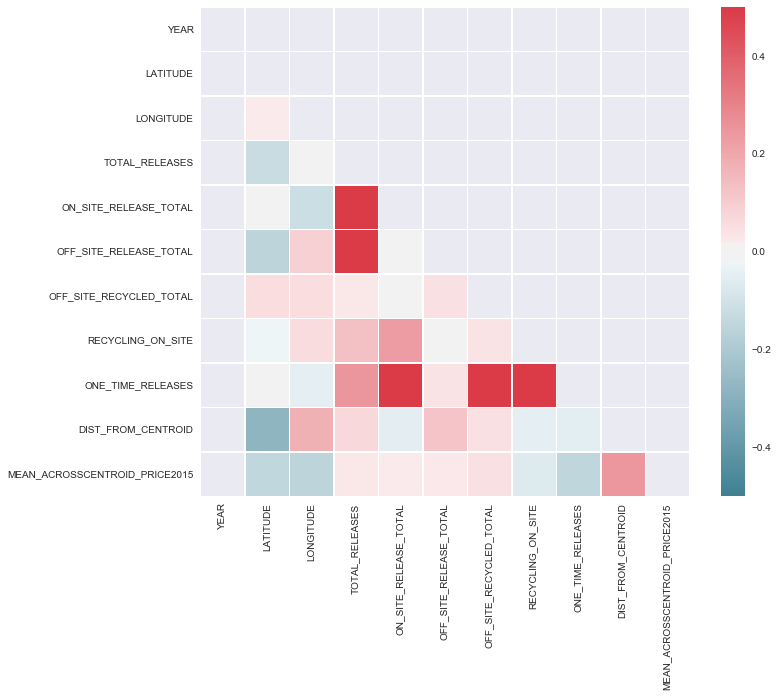

In [192]:
for i in range(2002,2016):
    names = ['YEAR','INDUSTRY_SECTOR','LATITUDE','LONGITUDE', 'CHEMICAL', 'CARCINOGEN','CAA_CHEMICAL','TOTAL_RELEASES','ON_SITE_RELEASE_TOTAL', \
                          'OFF_SITE_RELEASE_TOTAL', 'OFF_SITE_RECYCLED_TOTAL',\
                          'RECYCLING_ON_SITE', 'ONE_TIME_RELEASES','DIST_FROM_CENTROID','MEAN_ACROSSCENTROID_PRICE'+str(i)]   
    data_try = data_common_tri_zillow_centroid[names]
    df_temp=data_try[(data_try['YEAR']==i )]
    
    correlations1 = df_temp.corr()
    mask = np.zeros_like(correlations1, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlations1, mask=mask, cmap=cmap, vmax=0.5, center=0,square=True, linewidths=.5, cbar_kws={"shrink": 1})

The above Correlation Matrices show that there is a positive correlation between DIST_FROM_CENTROID and MEAN_ACROSSCENTROID_PRICE. Also, the least correlation is noticed in the year 2004 and the best correlation is noticed in the year 2010. Overall a positive correlation is a consistent observation across all the years.

Let us now try to fit the data in a Linear Regression Model for the features that are considered in the Null Hypothesis,DIST_FROM_CENTROID and MEAN_ACROSSCENTROID_PRICE for the years through 2002 to 2015.

In the below code, I'm trying to look at the features,DIST_FROM_CENTROID and MEAN_ACROSSCENTROID_PRICE and fit them in Linear Regression. 

Find the p values, to check and accept or reject the Null Hypothesis.

Find the summary vaules and tehn for the minimum and maximum values of the data, make predictions from the model that was fit by linear regression and plot the least squares line.

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy





2002:
(['YEAR', 'LATITUDE', 'LONGITUDE', 'TOTAL_RELEASES', 'ON_SITE_RELEASE_TOTAL', 'OFF_SITE_RELEASE_TOTAL', 'OFF_SITE_RECYCLED_TOTAL', 'RECYCLING_ON_SITE', 'DIST_FROM_CENTROID'], array([  0.00000000e+00,  -2.89884267e+03,  -5.39274846e+02,
         2.37894865e+01,  -2.37897461e+01,  -2.38196966e+01,
        -1.34628978e-03,  -5.66851085e-05,   3.22524111e+03]))
Intercept             4.532065e-122
DIST_FROM_CENTROID     8.697703e-08
dtype: float64
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x131d6edd8>>



2003:
(['YEAR', 'LATITUDE', 'LONGITUDE', 'TOTAL_RELEASES', 'ON_SITE_RELEASE_TOTAL', 'OFF_SITE_RELEASE_TOTAL', 'OFF_SITE_RECYCLED_TOTAL', 'RECYCLING_ON_SITE', 'DIST_FROM_CENTROID'], array([  0.00000000e+00,  -2.68256614e+03,  -1.65290395e+03,
        -3.67678873e+00,   3.67686465e+00,   3.68507604e+00,
        -1.45887719e-03,  -3.03584129e-04,   3.53684508e+03]))
Intercept             8.541137e-119
DIST_FROM_CENTROID     1

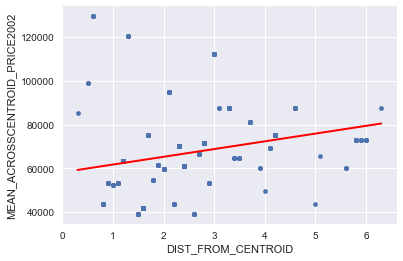

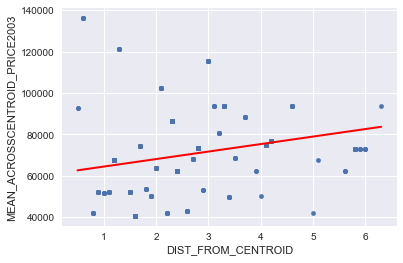

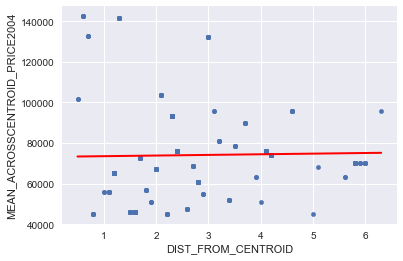

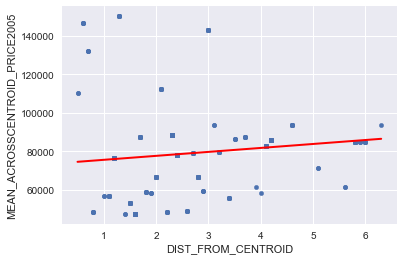

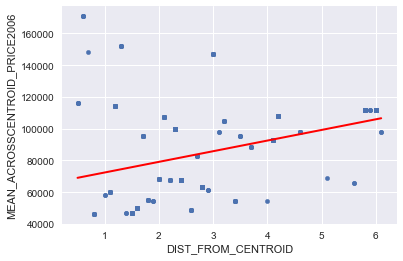

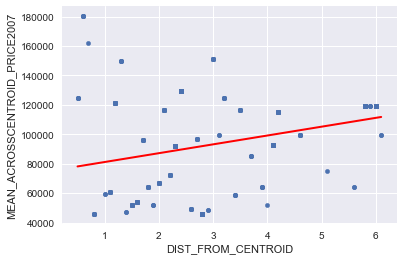

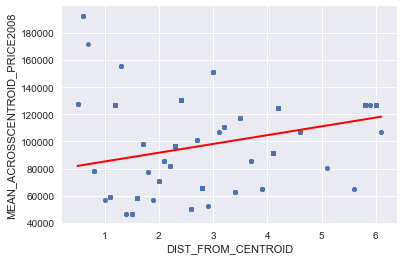

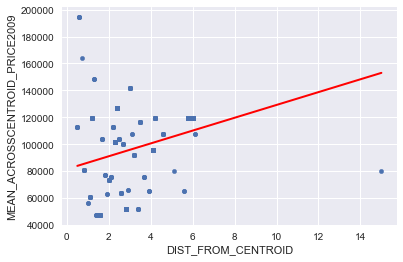

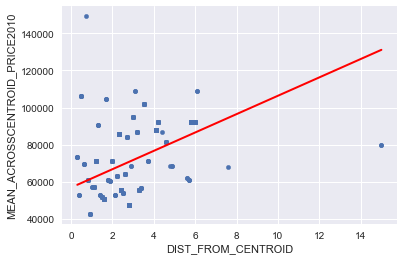

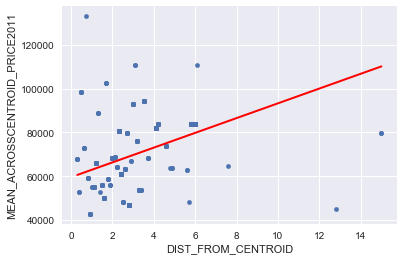

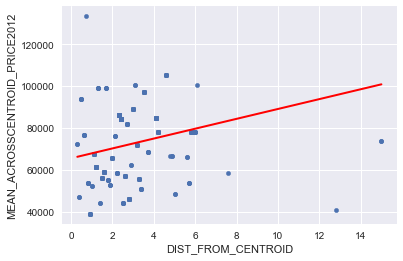

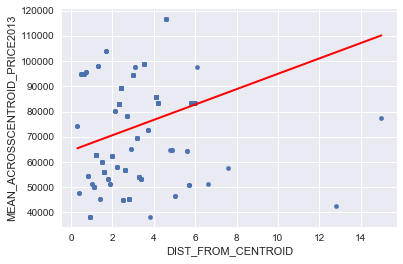

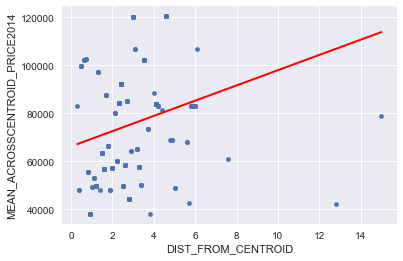

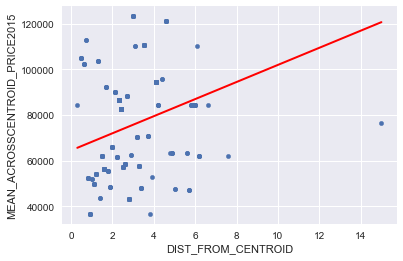

In [196]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
for i in range(2002,2016):
    
    
    col_names= ['YEAR','LATITUDE',        \
                          'LONGITUDE', 'TOTAL_RELEASES','ON_SITE_RELEASE_TOTAL', \
                          'OFF_SITE_RELEASE_TOTAL', 'OFF_SITE_RECYCLED_TOTAL',               \
                          'RECYCLING_ON_SITE','DIST_FROM_CENTROID','MEAN_ACROSSCENTROID_PRICE'+str(i)] 
    feature_cols = ['YEAR','LATITUDE',        \
                          'LONGITUDE', 'TOTAL_RELEASES','ON_SITE_RELEASE_TOTAL', \
                          'OFF_SITE_RELEASE_TOTAL', 'OFF_SITE_RECYCLED_TOTAL',               \
                          'RECYCLING_ON_SITE','DIST_FROM_CENTROID'] 
    data_try = data_common_tri_zillow_centroid[col_names]
    df_trial=data_try[(data_try['YEAR']==i )]
    df_trial.dropna(inplace= True)
    X = df_trial[feature_cols]
    y = df_trial['MEAN_ACROSSCENTROID_PRICE'+str(i)]
    # instantiate, fit
    lm = LinearRegression()
    lm.fit(X, y)

# print coefficients
    print('\n\n\n'+str(i)+':')
    print((feature_cols, lm.coef_))
    # create a fitted model in one line
    lm = smf.ols(formula='MEAN_ACROSSCENTROID_PRICE'+str(i)+' ~ DIST_FROM_CENTROID ', data=df_trial).fit()
    print(lm.pvalues)
    print(lm.summary)

# print the coefficients
    lm.params
    X_new = pd.DataFrame({'DIST_FROM_CENTROID': [df_trial.DIST_FROM_CENTROID.min(), df_trial.DIST_FROM_CENTROID.max()]})
    X_new.head()
    # make predictions for those x values and store them
    preds = lm.predict(X_new)
    preds
    # first, plot the observed data
    df_trial.plot(kind='scatter', x='DIST_FROM_CENTROID', y='MEAN_ACROSSCENTROID_PRICE'+str(i))
    # then, plot the least squares line
    plt.plot(X_new, preds, c='red', linewidth=2)
    


    
   

From the above results, a few observatins are made. Firstly, the pvalues for all the years (except the year 2004), is way below 0.05. So we can clearly reject the Null Hypothesis which says that there is no relationship between the features,DIST_FROM_CENTROID and MEAN_ACROSSCENTROID_PRICE. 

For the year 2004, it was already noticed in the correlation values, that it had the least correlation value of all the years and now the p value is also greather than 0.05 which is 0.7. So, in that case we cannot reject the null hypothesis.

The observations suport the alternate hypothesis which says there is a relationship between DIST_FROM_CENTROID and MEAN_ACROSSCENTROID_PRICE. and it is highly likely that as the distance of houses from the industries increses, there is an increase in the prices of the houses.